# Option 2: Prediction

# Data pre-processing and pivoting

In [1]:
import numpy as np

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
df=pd.read_excel("Online Retail.xlsx")

In [91]:
df.shape

(541909, 8)

In [7]:
df_=df.copy()
df_.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
Countycount=pd.DataFrame(df_["Country"].value_counts())

Countycount.rename(columns = {'Country':'Counts'}, inplace = True)
Countycount

,Counts
United Kingdom,495478
Germany,9495
France,8557
EIRE,8196
Spain,2533
Netherlands,2371
Belgium,2069
Switzerland,2002
Portugal,1519
Australia,1259


#### Let me choose USA country data points for our  preprocessing and model building .

In [9]:
df_USA=df_[df_["Country"]=="USA"]
df_USA.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:

df_USA.shape

(291, 8)

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


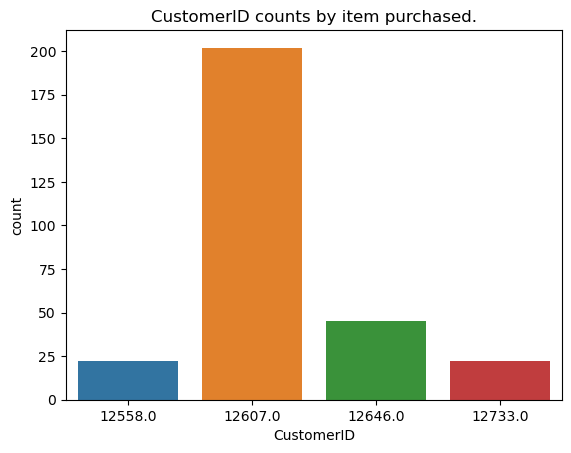

In [11]:
df_USA["CustomerID"].value_counts()
sns.countplot(df_USA.CustomerID)
plt.title("CustomerID counts by item purchased.")
plt.show()

### From invoiceDate column, we can extract Month ,Day and Time features.

In [12]:
df_USA["Year"]=df_["InvoiceDate"].dt.year
df_USA["Month"]=df_["InvoiceDate"].dt.month
df_USA["Day"]=df_["InvoiceDate"].dt.day
df_USA["Time"]=df_["InvoiceDate"].dt.time

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14896\490749111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_USA["Year"]=df_["InvoiceDate"].dt.year
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14896\490749111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_USA["Month"]=df_["InvoiceDate"].dt.month
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14896\490749111.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


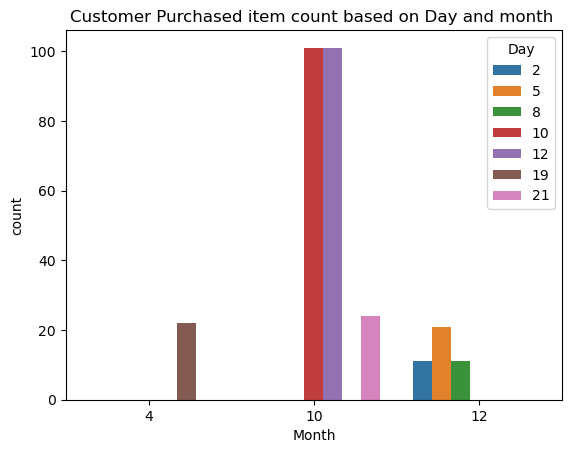

In [13]:
sns.countplot(df_USA.Month,hue=df_USA.Day)
plt.title("Customer Purchased item count based on Day and month ")
plt.show()

### we are going to use only these five features for our prediction 

In [14]:
X=df_USA[["Quantity","CustomerID","Month","Year","Day","Time"]]

X

,Quantity,CustomerID,Month,Year,Day,Time
164464,7,12733.0,4,2011,19,16:19:00
164465,2,12733.0,4,2011,19,16:19:00
164466,3,12733.0,4,2011,19,16:19:00
164467,1,12733.0,4,2011,19,16:19:00
164468,1,12733.0,4,2011,19,16:19:00
...,...,...,...,...,...,...
536922,-36,12558.0,12,2011,8,10:14:00
536923,-12,12558.0,12,2011,8,10:14:00
536924,-12,12558.0,12,2011,8,10:14:00
536925,-12,12558.0,12,2011,8,10:14:00


In [15]:

Month4=X[X["Month"]==4]

Month10=X[X["Month"]==10]
Month12=X[X["Month"]==12]

#### Month 4

In [16]:
Month4

,Quantity,CustomerID,Month,Year,Day,Time
164464,7,12733.0,4,2011,19,16:19:00
164465,2,12733.0,4,2011,19,16:19:00
164466,3,12733.0,4,2011,19,16:19:00
164467,1,12733.0,4,2011,19,16:19:00
164468,1,12733.0,4,2011,19,16:19:00
164469,3,12733.0,4,2011,19,16:19:00
164470,6,12733.0,4,2011,19,16:19:00
164471,3,12733.0,4,2011,19,16:19:00
164472,12,12733.0,4,2011,19,16:19:00
164473,4,12733.0,4,2011,19,16:19:00


In [17]:
Month4["Quantity"].value_counts()


6     7
3     3
7     2
2     2
1     2
4     2
5     2
12    1
36    1
Name: Quantity, dtype: int64

In [18]:
Month4["Quantity"].describe()

count    22.000000
mean      6.227273
std       7.090784
min       1.000000
25%       3.000000
50%       5.500000
75%       6.000000
max      36.000000
Name: Quantity, dtype: float64

In [19]:
Q1=Month4["Quantity"].quantile(0.25)
Q3=Month4["Quantity"].quantile(0.75)

IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit

(-1.5, 10.5)

In [20]:
m4del_i=Month4[(Month4["Quantity"]<lower_limit)|(Month4["Quantity"]>upper_limit)].index
m4del_i

Int64Index([164472, 164477], dtype='int64')

In month 4 we have 2 outliers we can remove it .

#### Month 12

In [21]:
Month12.shape

(43, 6)

In [22]:
Month12["Day"].value_counts()

5    21
2    11
8    11
Name: Day, dtype: int64

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


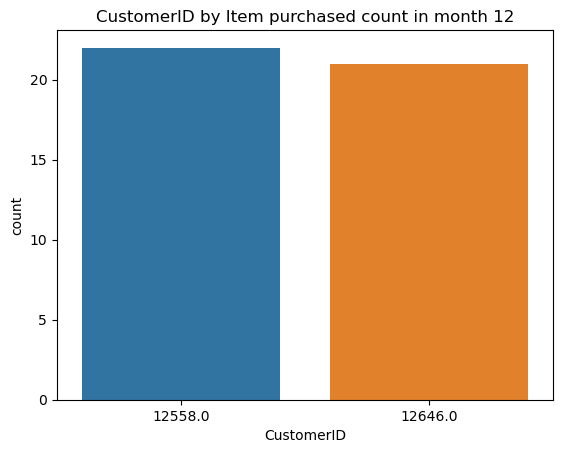

In [23]:
sns.countplot(Month12.CustomerID)
plt.title("CustomerID by Item purchased count in month 12")
plt.show()

In [45]:
a=Month12[Month12["CustomerID"]==12558.0]

a

,Quantity,CustomerID,Month,Year,Day,Time
519634,12,12558.0,12,2011,2,10:41:00
519635,10,12558.0,12,2011,2,10:41:00
519636,10,12558.0,12,2011,2,10:41:00
519637,20,12558.0,12,2011,2,10:41:00
519638,24,12558.0,12,2011,2,10:41:00
519639,24,12558.0,12,2011,2,10:41:00
519640,24,12558.0,12,2011,2,10:41:00
519641,36,12558.0,12,2011,2,10:41:00
519642,12,12558.0,12,2011,2,10:41:00
519643,12,12558.0,12,2011,2,10:41:00


We can remove 36,-36

In [25]:
b=Month12[Month12["CustomerID"]==12646.0]
b

,Quantity,CustomerID,Month,Year,Day,Time
524416,16,12646.0,12,2011,5,10:14:00
524417,16,12646.0,12,2011,5,10:14:00
524418,16,12646.0,12,2011,5,10:14:00
524419,16,12646.0,12,2011,5,10:14:00
524420,16,12646.0,12,2011,5,10:14:00
524421,8,12646.0,12,2011,5,10:14:00
524422,8,12646.0,12,2011,5,10:14:00
524423,8,12646.0,12,2011,5,10:14:00
524424,8,12646.0,12,2011,5,10:14:00
524425,24,12646.0,12,2011,5,10:14:00


we can remove 72,24

#### Month 10

In [26]:
Month10.shape

(226, 6)

In [27]:
Month10

,Quantity,CustomerID,Month,Year,Day,Time
389350,12,12607.0,10,2011,10,16:06:00
389351,12,12607.0,10,2011,10,16:06:00
389352,4,12607.0,10,2011,10,16:06:00
389353,3,12607.0,10,2011,10,16:06:00
389354,2,12607.0,10,2011,10,16:06:00
...,...,...,...,...,...,...
411323,24,12646.0,10,2011,21,12:52:00
411324,6,12646.0,10,2011,21,12:52:00
411325,4,12646.0,10,2011,21,12:52:00
411326,4,12646.0,10,2011,21,12:52:00


In [28]:
Month10["CustomerID"].value_counts()


12607.0    202
12646.0     24
Name: CustomerID, dtype: int64

In [29]:
Month10["Day"].value_counts()

10    101
12    101
21     24
Name: Day, dtype: int64

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


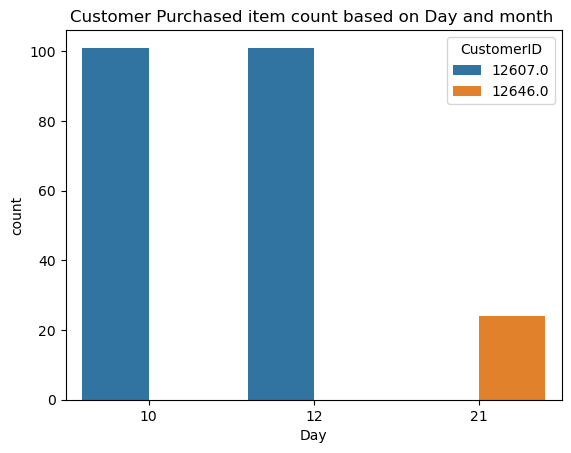

In [30]:
sns.countplot(Month10.Day,hue=Month10.CustomerID)
plt.title("Customer Purchased item count based on Day and month ")
plt.show()

In [31]:
c10=Month10[Month10["CustomerID"]==12646.0]
c10["Quantity"].value_counts()

24    5
6     5
4     4
48    4
32    2
3     1
36    1
16    1
12    1
Name: Quantity, dtype: int64

In [32]:
Q1=c10["Quantity"].quantile(0.25)
Q3=c10["Quantity"].quantile(0.75)

IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit

(-33.0, 71.0)

In [33]:
c12_=Month10[Month10["CustomerID"]==12607.0]
c12_["Day"].value_counts()

10    101
12    101
Name: Day, dtype: int64

In [34]:
c12_[c12_["Day"]==10]["Quantity"].value_counts()

12    34
6     12
24    11
4      9
25     9
8      6
10     6
3      5
2      3
16     2
5      1
1      1
20     1
36     1
Name: Quantity, dtype: int64

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Quantity'>

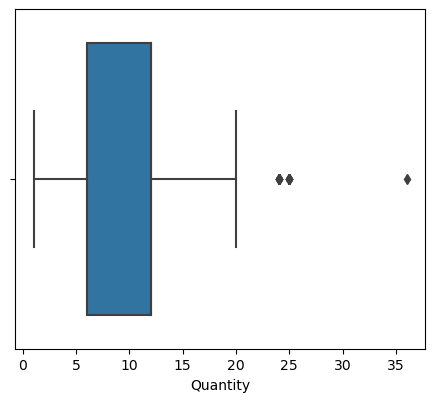

In [36]:
plt.figure(figsize=(18,15))

plt.subplot(3,3,1)

sns.boxplot(c12_[c12_["Day"]==10]["Quantity"])


In [44]:
c12_[c12_["Day"]==12]["Quantity"].value_counts()



-12    34
-6     12
-24    11
-4      9
-25     9
-8      6
-10     6
-3      5
-2      3
-16     2
-20     1
-1      1
-5      1
-36     1
Name: Quantity, dtype: int64

I can  remove  36 id 389418	

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Quantity'>

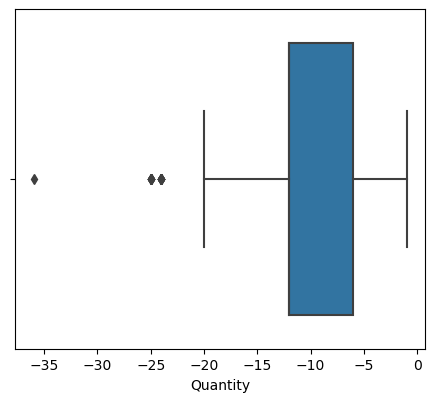

In [37]:
plt.figure(figsize=(18,15))

plt.subplot(3,3,1)

sns.boxplot(c12_[c12_["Day"]==12]["Quantity"])


I can remove -36  id 394033	

In [89]:
m12del_i=[519641,536922,524426,524434,524425,389418,394033]

# Regression Model Building

In [46]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn .model_selection import train_test_split,cross_val_score,KFold

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor


In [47]:
m12del_i.extend(list(m4del_i))
m12del_i

[519641, 536922, 524426, 524434, 524425, 389418, 394033, 164472, 164477]

In [48]:
X=X.drop(m12del_i,axis=0)

In [49]:
x=X.drop(["Quantity","Time"],axis=1)
y=X["Quantity"]

In [65]:
X_train, X_test, y_train, y_test= train_test_split(x,y,test_size = 0.25,random_state=9337 )  
#2 74

In [66]:
regressor = DecisionTreeRegressor(random_state = 1) 
  

Model=regressor.fit(X_train, y_train)
y_pred = Model.predict(X_test)

In [67]:

score = r2_score(y_test, y_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 85.0%


In [69]:
LR = LinearRegression()
model_LR = LR.fit(X_train, y_train)
model_LR_pred = model_LR.predict(X_test)

In [70]:
f"The R2 score for LR model is {r2_score(y_test, model_LR_pred )*100}"

'The R2 score for LR model is 3.8219109777784532'

#### From above Linear model accurcy we can say  that our data set is not linearly seperated 

In [71]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
 

regressor = RandomForestRegressor(n_estimators=100,
                                  random_state=1)
regressor.fit(X_train, y_train)
y_pred_ = regressor.predict(X_test)

In [72]:
score = r2_score(y_test, y_pred_)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 66.0%


In [43]:

from sklearn.svm import SVR
svr = SVR(kernel='sigmoid')
  

svr.fit(X_train, y_train)
  

y_pred_ = svr.predict(X_test)

In [44]:
score = r2_score(y_test, y_pred_)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is -1.0%


### Model Deployment

In [79]:
import pickle

In [80]:

pickle_=open("Model","wb")
pickle.dump(Model,pickle_)
pickle_.close()

In [81]:
pickel_in=open("Model","rb")
model=pickle.load(pickel_in)
#pred = model.predict(X_test)

#print("The accuracy of our model is {}%".format(round(score, 2) *100))

In [ ]:
pred = model.predict(X_test)

In [69]:
X_test

,CustomerID,Month,Year,Day
389356,12607.0,10,2011,10
394004,12607.0,10,2011,12
524433,12646.0,12,2011,5
524419,12646.0,12,2011,5
524423,12646.0,12,2011,5
...,...,...,...,...
394084,12607.0,10,2011,12
411307,12646.0,10,2011,21
411316,12646.0,10,2011,21
524436,12646.0,12,2011,5


#### Task:
#### User Story: User should be able to provide a Customer ID and Date, and program should be able to predict quantity.


In [93]:
values=[]
a=float(input("Enter CustomerID"))
values.append(a)
a=input("Enter Year")
b=int(input("Enter  Month"))
c= int(input("Enter Day"))
values.append(int(a))
values.append(int(b))
values.append(int(c))
pred = model.predict([values])
print("Output Predicted Quantity:",int(pred))

Enter CustomerID12607.0
Enter Year2011
Enter  Month10
Enter Day10
Output Predicted Quantity: 13


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
